<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span></li><li><span><a href="#Using-np.polyfit" data-toc-modified-id="Using-np.polyfit-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using np.polyfit</a></span><ul class="toc-item"><li><span><a href="#Using-curve_fit" data-toc-modified-id="Using-curve_fit-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Using curve_fit</a></span></li></ul></li><li><span><a href="#Using-scipy.stats.linregress" data-toc-modified-id="Using-scipy.stats.linregress-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using scipy.stats.linregress</a></span></li><li><span><a href="#Using-statsmodels.api" data-toc-modified-id="Using-statsmodels.api-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Using statsmodels.api</a></span><ul class="toc-item"><li><span><a href="#scatterplot-using-statsmodels" data-toc-modified-id="scatterplot-using-statsmodels-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>scatterplot using statsmodels</a></span></li><li><span><a href="#summary-using-statsmodels.formula.api" data-toc-modified-id="summary-using-statsmodels.formula.api-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>summary using statsmodels.formula.api</a></span></li><li><span><a href="#Predict-new-values-using-sm.OLS.from_formula" data-toc-modified-id="Predict-new-values-using-sm.OLS.from_formula-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Predict new values using sm.OLS.from_formula</a></span></li></ul></li><li><span><a href="#Using-sklearn" data-toc-modified-id="Using-sklearn-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Using sklearn</a></span></li></ul></div>

In [1]:
!head data_allerr.dat

# index & x & y & sigm_y & sigma_x & corr 
1 & 201 & 592 & 61 & 9 & -0.84
2 & 244 & 401 & 25 & 4 & 0.31
3 & 47 & 583 & 38 & 11 & 0.64
4 & 287 & 402 & 15 & 7 & -0.27
5 & 203 & 495 & 21 & 5 & -0.33
6 & 58 & 173 & 15 & 9 & 0.67
7 & 210 & 479 & 27 & 4 & -0.02
8 & 202 & 504 & 14 & 4 & -0.05
9 & 198 & 510 & 30 & 11 & -0.84


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [19]:
df = pd.read_csv('data_allerr.dat',sep='&')
df.columns = [i.strip('#').strip() for i in df.columns]
df = df.iloc[5:,:] # exclude first 5 rows
df

,index,x,y,sigm_y,sigma_x,corr
5,6,58,173,15,9,0.67
6,7,210,479,27,4,-0.02
7,8,202,504,14,4,-0.05
8,9,198,510,30,11,-0.84
9,10,158,416,16,7,-0.69
10,11,165,393,14,5,0.30
11,12,201,442,25,5,-0.46
12,13,157,317,52,5,-0.03
13,14,131,311,16,6,0.50
14,15,166,400,34,6,0.73


# Using np.polyfit

first row = 58.0, 173.0, 15.0
slope =  2.191027996426707
intercept =  32.00396939102271
newarr =  [[50 60]]
pred  =  [array([141.55536921, 163.46564918])]


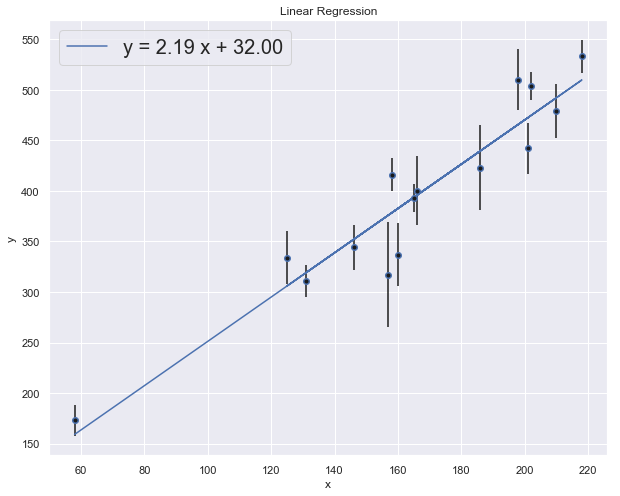

In [28]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [10, 8]

# load data
x,y,yerr = np.loadtxt('data_allerr.dat',delimiter='&',usecols=(1,2,3),unpack=True)
x,y,yerr = x[5:], y[5:],yerr[5:]

print('first row = {}, {}, {}'.format(x[0],y[0],yerr[0]))

# Find the slope and intercept of the best fit line
slope, intercept = np.polyfit(x, y, 1)
print('slope = ', slope)
print('intercept = ', intercept)

# prediction
newarr = np.array([[50,60]])
pred = [i*slope + intercept for i in newarr]
print('newarr = ', newarr)
print('pred  = ', pred)

# Create a list of values in the best fit line
abline_values = [slope * i + intercept for i in x]

# Plot the best fit line over the actual values
plt.plot(x, y,'o')

label = 'y = {:.2f} x + {:.2f}'.format(slope,intercept)
plt.plot(x, abline_values, 'b',label=label)

plt.errorbar(x, y, yerr=yerr, fmt='.k')

plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=20)
plt.show()

## Using curve_fit

slope =  2.1910279964293027
intercept =  32.00396939109058
newarr =  [[50 60]]
pred  =  [array([141.55536921, 163.46564918])]


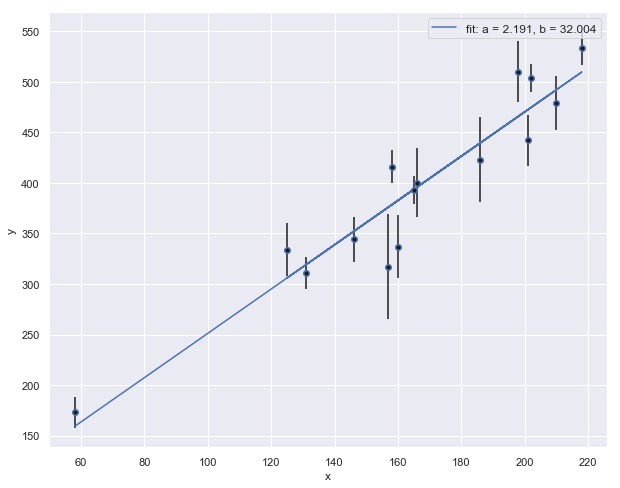

In [5]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 8]

def func(x, a, b):
    return a * x + b

x = df['x'].values
y = df['y'].values
yerr= df['sigm_y'].values

popt, pcov = curve_fit(func, x, y)

# Find the slope and intercept of the best fit line
slope, intercept = popt
print('slope = ', slope)
print('intercept = ', intercept)

# prediction
newarr = np.array([[50,60]])
pred = [i*slope + intercept for i in newarr]
print('newarr = ', newarr)
print('pred  = ', pred)

plt.plot(x, y,'o')
plt.errorbar(x, y, yerr=yerr, fmt='.k')

plt.plot(x, func(x, *popt), 'b-',
         label='fit: a = %5.3f, b = %5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=12)

plt.show()

# Using scipy.stats.linregress

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


slope =  2.1910279964267083
intercept =  32.00396939102251
newarr =  [[50 60]]
pred  =  [array([141.55536921, 163.46564918])]


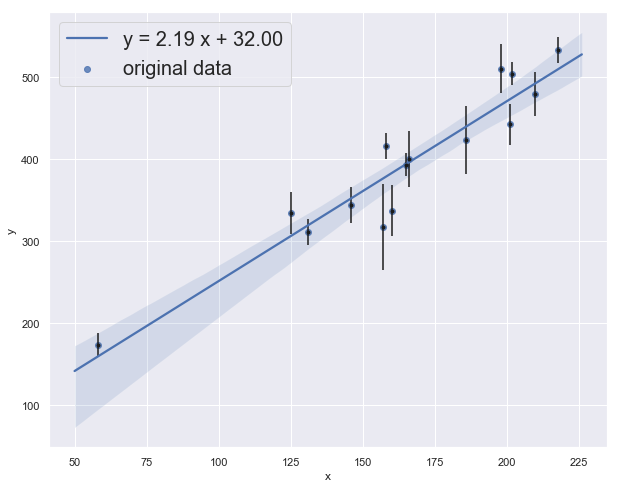

In [6]:
from scipy.stats import linregress
import seaborn as sns
plt.rcParams["figure.figsize"] = [10, 8]

# get the regression plot using seaborn
p = sns.regplot('x','y', df)

xp = p.get_lines()[0].get_xdata()
yp = p.get_lines()[0].get_ydata()

slope, intercept, r_value, p_value, std_err = linregress(x=xp,y=yp)

# Find the slope and intercept of the best fit line
print('slope = ', slope)
print('intercept = ', intercept)

# prediction
newarr = np.array([[50,60]])
pred = [i*slope + intercept for i in newarr]
print('newarr = ', newarr)
print('pred  = ', pred)

label = 'y = {:.2f} x + {:.2f}'.format(slope,intercept)
p.legend((label,'original data'),fontsize=20)

plt.errorbar(x, y, yerr=yerr, fmt='.k');                            

# Using statsmodels.api

slope =  2.1910279964267074
intercept =  32.00396939102271
newarr =  [50 60]
pred  =  [141.55536921235807, 163.46564917662516]


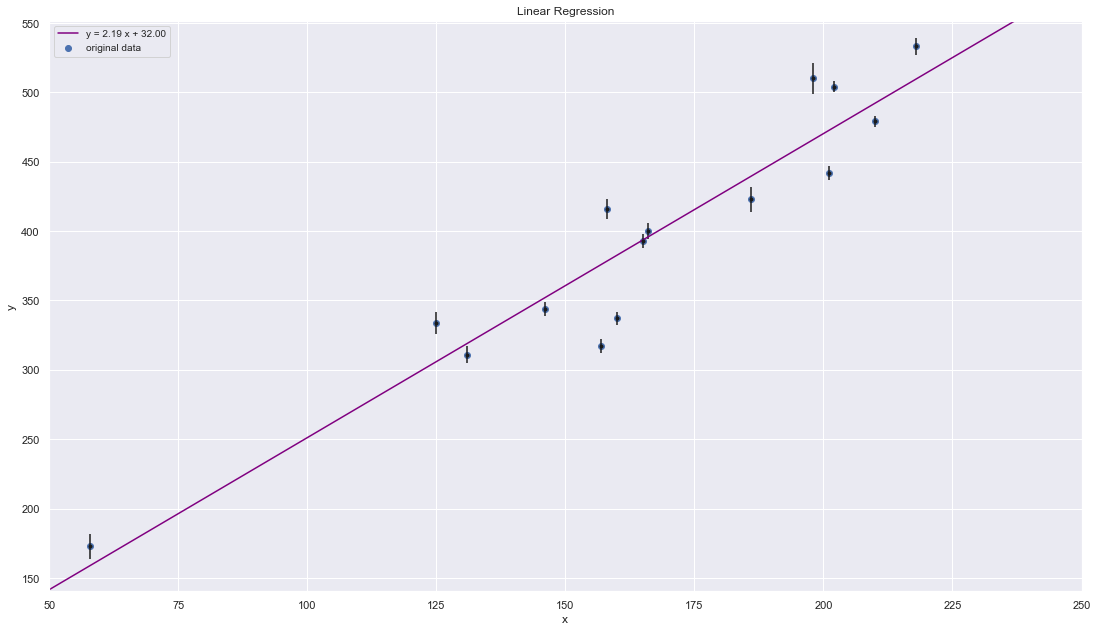

[32.00396939  2.191028  ]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     115.3
Date:                Tue, 22 Jan 2019   Prob (F-statistic):           7.84e-08
Time:                        19:13:31   Log-Likelihood:                -71.931
No. Observations:                  15   AIC:                             147.9
Df Residuals:                      13   BIC:                             149.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.0040     

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [7]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]

X = sm.add_constant(df.x.values)
y = df.y.values

model = sm.OLS(y,X)
results = model.fit()



# Find the slope and intercept of the best fit line
intercept, slope = results.params
print('slope = ', slope)
print('intercept = ', intercept)

# prediction
newarr = np.array([50,60])
pred = [i*slope + intercept for i in newarr]
print('newarr = ', newarr)
print('pred  = ', pred)

fig = sm.graphics.abline_plot(model_results=results)
fig.set_size_inches(18.5, 10.5)

ax = fig.axes[0]
ax.scatter(X[:,1], y)

ax.margins(.1)
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(50,250)

label = 'y = {:.2f} x + {:.2f}'.format(results.params[1],results.params[0])
ax.legend((label,'original data'),fontsize=10)

x = df['x'].values
y = df['y'].values
yerr = df['sigma_x'].values
plt.errorbar(x, y, yerr=yerr, fmt='.k')

plt.show()
print(results.params)
print(results.summary())

## scatterplot using statsmodels

x            2.191028
constant    32.003969
dtype: float64


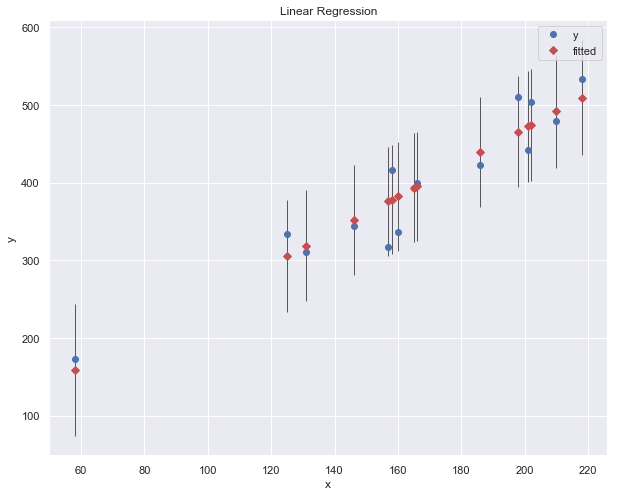

In [16]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]

# explicit method
X = df['x'].to_frame()
X['constant'] = 1
y = df['y']
model = sm.OLS(y,X)
results = model.fit()

# implicit
# results = smf.ols(formula='y ~ x', data=df).fit() # inter = 32.003969

# print params
print(results.params)

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)

ax.set_ylabel("y")
ax.set_xlabel("x")
ax.set_title("Linear Regression")
plt.show()

## summary using statsmodels.formula.api

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     115.3
Date:                Tue, 22 Jan 2019   Prob (F-statistic):           7.84e-08
Time:                        19:17:33   Log-Likelihood:                -71.931
No. Observations:                  15   AIC:                             147.9
Df Residuals:                      13   BIC:                             149.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.0040     34.715      0.922      0.3

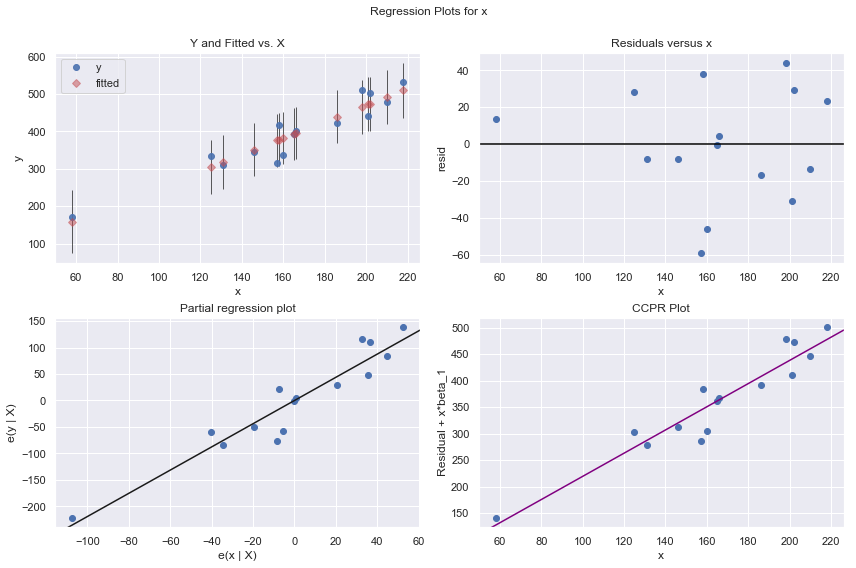

In [14]:
import statsmodels.formula.api as smf

result = smf.ols(formula='y ~ x', data=df).fit()
print(result.summary())

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(result,'x',fig=fig)
plt.show()

## Predict new values using sm.OLS.from_formula

In [11]:
import statsmodels.api as sm

model = sm.OLS.from_formula("y ~ x", df)
result = model.fit()

intercept, slope = result.params
print('slope = ', slope)
print('intercept = ', intercept)

newarr = [50,60]
exog = pd.DataFrame({"x": newarr}) # needs column name 'x'
pred = result.predict(exog)
print('pred = ', pred.values)
print('calc = ', 50*slope + intercept)

slope =  2.1910279964267074
intercept =  32.00396939102271
pred =  [141.55536921 163.46564918]
calc =  141.55536921235807


# Using sklearn

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]

from sklearn.linear_model import LinearRegression

df = pd.read_csv('data_allerr.dat',sep='&')
df.columns = [i.strip('#').strip() for i in df.columns]
df = df.iloc[5:,:]


X = df.x.values[:,None]
y = df.y.values


reg = LinearRegression().fit(X, y)

# score
print('R^2 = ', reg.score(X,y))

# Find the slope and intercept of the best fit line
slope, intercept = reg.coef_[0], reg.intercept_
print('slope = ', slope)
print('intercept = ', intercept)

# prediction
newarr = np.array([50,60]).reshape(-1,1)
pred = reg.predict(newarr)
print('newarr = ', newarr)
print('pred  = ', pred)

R^2 =  0.8986571835066672
slope =  2.1910279964267048
intercept =  32.00396939102302
newarr =  [[50]
 [60]]
pred  =  [141.55536921 163.46564918]
